In [1]:
# Import pandas dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
# Load cleaned byarea_df
c_byarea_df = pd.read_csv('cleaned_byarea_df.txt', ',')
c_byarea_df.head()

C:\Users\yingk\anaconda3\envs\mlenv\lib\site-packages\IPython\core\interactiveshell.py:3457: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


,AREA,AGE_ADJUSTED_CI_LOWER,AGE_ADJUSTED_CI_UPPER,AGE_ADJUSTED_RATE,EVENT_TYPE,POPULATION,RACE,SEX,SITE,YEAR,CRUDE_CI_LOWER,CRUDE_CI_UPPER,CRUDE_RATE
0,Alabama,359.7,374.7,367.2,Incidence,2293259,All Races,Female,All Cancer Sites Combined,1999,397.3,413.8,405.5
1,Alabama,160.6,170.5,165.5,Mortality,2293259,All Races,Female,All Cancer Sites Combined,1999,184.8,196.1,190.4
2,Alabama,362.1,377.1,369.5,Incidence,2302835,All Races,Female,All Cancer Sites Combined,2000,403.2,419.8,411.4
3,Alabama,160.8,170.6,165.7,Mortality,2302835,All Races,Female,All Cancer Sites Combined,2000,186.5,197.9,192.2
4,Alabama,377.7,392.9,385.2,Incidence,2309496,All Races,Female,All Cancer Sites Combined,2001,423.3,440.3,431.7


In [3]:
# check c_byarea_df columns
c_byarea_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 949308 entries, 0 to 949307
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   AREA                   949308 non-null  object 
 1   AGE_ADJUSTED_CI_LOWER  949308 non-null  float64
 2   AGE_ADJUSTED_CI_UPPER  949308 non-null  float64
 3   AGE_ADJUSTED_RATE      949308 non-null  float64
 4   EVENT_TYPE             949308 non-null  object 
 5   POPULATION             949308 non-null  int64  
 6   RACE                   949308 non-null  object 
 7   SEX                    949308 non-null  object 
 8   SITE                   949308 non-null  object 
 9   YEAR                   949308 non-null  int64  
 10  CRUDE_CI_LOWER         949308 non-null  float64
 11  CRUDE_CI_UPPER         949308 non-null  float64
 12  CRUDE_RATE             949308 non-null  float64
dtypes: float64(6), int64(2), object(5)
memory usage: 94.2+ MB


In [4]:
# load per_capita_income file
income_df = pd.read_csv('cleaned_per_capita_income.csv')
income_df

,GeoName,1999,2000,2001,2002,2003,2004,2005,2006,2007,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,United States,28693,30672,31617,31839,32717,34280,35868,38120,39883,...,40683,42747,44548,44798,46887,48725,49613,51550,53786,56250
1,Alabama,23333,24306,25057,25648,26673,28434,29949,31474,32739,...,33946,35010,35824,36014,37055,38531,39014,40223,41539,43288
2,Alaska,29951,32044,33626,34756,35996,37016,39075,41157,43906,...,49652,52569,53708,52812,55867,57575,56278,57189,59618,61316
3,Arizona,24960,26388,27008,27353,28393,30221,32327,34703,35872,...,33876,35321,36545,37139,38756,40334,41473,43497,45466,48124
4,Arkansas,21871,22781,23873,24306,25595,27059,28227,29617,31303,...,32372,34279,36582,36677,38749,39968,40873,41890,43384,44324
5,California,30773,33410,34046,34131,35272,37070,38932,41746,43385,...,43246,45557,48121,48502,51266,54546,56560,58804,61508,64919
6,Colorado,31305,34029,34897,34438,34856,35819,37797,40137,42074,...,40790,43658,45630,47404,50797,52339,52390,55251,58453,62124
7,Connecticut,39700,43070,45153,44697,44997,47238,49738,53696,57684,...,61743,63132,64121,62647,65498,67321,68680,70011,72926,75533
8,Delaware,31181,33884,36922,37658,38065,38974,39370,41053,41733,...,40942,43962,44070,44404,46015,47868,48734,50417,52716,54217
9,District of Columbia,39798,43524,44871,45147,46011,50088,52947,55805,59824,...,63368,67005,68148,67774,71469,75623,78186,79984,82708,84671


## prepare INCOME data

In [5]:
# reshape income_df to long form to merge with cancer data
# how to: https://towardsdatascience.com/how-to-reshape-a-pandas-dataframe-98b42c428a8

# first need to rename each column in order to use the wide_to_long()
income_df.rename(columns={'1999':'INCOME_1999',
                       '2000':'INCOME_2000',
                       '2001':'INCOME_2001',
                       '2002':'INCOME_2002',
                       '2003':'INCOME_2003',
                       '2004':'INCOME_2004',
                       '2005':'INCOME_2005',
                       '2006':'INCOME_2006',
                       '2007':'INCOME_2007',
                       '2008':'INCOME_2008',
                       '2009':'INCOME_2009',
                       '2010':'INCOME_2010',
                       '2011':'INCOME_2011',
                       '2012':'INCOME_2012',
                       '2013':'INCOME_2013',
                       '2014':'INCOME_2014',
                       '2015':'INCOME_2015',
                       '2016':'INCOME_2016',
                       '2017':'INCOME_2017',
                       '2018':'INCOME_2018',
                       '2019':'INCOME_2019',}, inplace=True)

In [6]:
income_df.head()

,GeoName,INCOME_1999,INCOME_2000,INCOME_2001,INCOME_2002,INCOME_2003,INCOME_2004,INCOME_2005,INCOME_2006,INCOME_2007,...,INCOME_2010,INCOME_2011,INCOME_2012,INCOME_2013,INCOME_2014,INCOME_2015,INCOME_2016,INCOME_2017,INCOME_2018,INCOME_2019
0,United States,28693,30672,31617,31839,32717,34280,35868,38120,39883,...,40683,42747,44548,44798,46887,48725,49613,51550,53786,56250
1,Alabama,23333,24306,25057,25648,26673,28434,29949,31474,32739,...,33946,35010,35824,36014,37055,38531,39014,40223,41539,43288
2,Alaska,29951,32044,33626,34756,35996,37016,39075,41157,43906,...,49652,52569,53708,52812,55867,57575,56278,57189,59618,61316
3,Arizona,24960,26388,27008,27353,28393,30221,32327,34703,35872,...,33876,35321,36545,37139,38756,40334,41473,43497,45466,48124
4,Arkansas,21871,22781,23873,24306,25595,27059,28227,29617,31303,...,32372,34279,36582,36677,38749,39968,40873,41890,43384,44324


In [7]:
# convert income_df to long format
income_long_df = pd.wide_to_long(income_df, 
                              stubnames=['INCOME'],
                              i='GeoName',
                              j='YEAR',
                              sep="_",
                              suffix='\w+')
income_long_df

,,INCOME
GeoName,YEAR,
United States,1999,28693
Alabama,1999,23333
Alaska,1999,29951
Arizona,1999,24960
Arkansas,1999,21871
...,...,...
Virginia,2019,59073
Washington,2019,64189
West Virginia,2019,42951


In [8]:
# Adding back index for ease of merging later
income_long_df = income_long_df.reset_index()
income_long_df

,GeoName,YEAR,INCOME
0,United States,1999,28693
1,Alabama,1999,23333
2,Alaska,1999,29951
3,Arizona,1999,24960
4,Arkansas,1999,21871
...,...,...,...
1087,Virginia,2019,59073
1088,Washington,2019,64189
1089,West Virginia,2019,42951
1090,Wisconsin,2019,52893


## prepare cancer data

In [9]:
# filter for rows with total state cancer mortality
state_all_df = c_byarea_df.loc[(c_byarea_df['EVENT_TYPE']=='Mortality') &
                              (c_byarea_df['SEX']=='Male and Female') &
                              (c_byarea_df['RACE']=='All Races') &
                              (c_byarea_df['SITE']=='All Cancer Sites Combined') &
                              (c_byarea_df['YEAR']!= 20152019)
                              ]
state_all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1071 entries, 2003 to 932477
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   AREA                   1071 non-null   object 
 1   AGE_ADJUSTED_CI_LOWER  1071 non-null   float64
 2   AGE_ADJUSTED_CI_UPPER  1071 non-null   float64
 3   AGE_ADJUSTED_RATE      1071 non-null   float64
 4   EVENT_TYPE             1071 non-null   object 
 5   POPULATION             1071 non-null   int64  
 6   RACE                   1071 non-null   object 
 7   SEX                    1071 non-null   object 
 8   SITE                   1071 non-null   object 
 9   YEAR                   1071 non-null   int64  
 10  CRUDE_CI_LOWER         1071 non-null   float64
 11  CRUDE_CI_UPPER         1071 non-null   float64
 12  CRUDE_RATE             1071 non-null   float64
dtypes: float64(6), int64(2), object(5)
memory usage: 117.1+ KB


In [10]:
state_all_df.head()

,AREA,AGE_ADJUSTED_CI_LOWER,AGE_ADJUSTED_CI_UPPER,AGE_ADJUSTED_RATE,EVENT_TYPE,POPULATION,RACE,SEX,SITE,YEAR,CRUDE_CI_LOWER,CRUDE_CI_UPPER,CRUDE_RATE
2003,Alabama,206.5,215.1,210.8,Mortality,4430141,All Races,Male and Female,All Cancer Sites Combined,1999,210.3,218.9,214.6
2005,Alabama,210.4,219.0,214.7,Mortality,4452173,All Races,Male and Female,All Cancer Sites Combined,2000,215.9,224.7,220.3
2007,Alabama,208.6,217.0,212.8,Mortality,4467634,All Races,Male and Female,All Cancer Sites Combined,2001,215.1,223.8,219.4
2009,Alabama,204.3,212.6,208.4,Mortality,4480089,All Races,Male and Female,All Cancer Sites Combined,2002,212.2,220.8,216.5
2011,Alabama,204.1,212.4,208.3,Mortality,4503491,All Races,Male and Female,All Cancer Sites Combined,2003,213.6,222.2,217.9


In [11]:
# Pick out just the columns needed for our linear regression analysis
# CRUDE_RATE as the independent variable
state_lr_df = state_all_df[['AREA', 'YEAR', 'CRUDE_RATE']]
state_lr_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1071 entries, 2003 to 932477
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   AREA        1071 non-null   object 
 1   YEAR        1071 non-null   int64  
 2   CRUDE_RATE  1071 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 33.5+ KB


In [12]:
state_lr_df

,AREA,YEAR,CRUDE_RATE
2003,Alabama,1999,214.6
2005,Alabama,2000,220.3
2007,Alabama,2001,219.4
2009,Alabama,2002,216.5
2011,Alabama,2003,217.9
...,...,...,...
932467,Wyoming,2015,158.8
932471,Wyoming,2016,164.4
932473,Wyoming,2017,163.4
932475,Wyoming,2018,172.2


## prepare Linear Regression data

In [13]:
# merge the cancer df and income df using "State" & "Year"
lr_df = pd.merge(income_long_df, state_lr_df, how='left', left_on=['GeoName', 'YEAR'], right_on=['AREA', 'YEAR'])
lr_df

,GeoName,YEAR,INCOME,AREA,CRUDE_RATE
0,United States,1999,28693,NaN,NaN
1,Alabama,1999,23333,Alabama,214.6
2,Alaska,1999,29951,Alaska,101.3
3,Arizona,1999,24960,Arizona,179.3
4,Arkansas,1999,21871,Arkansas,231.4
...,...,...,...,...,...
1087,Virginia,2019,59073,Virginia,175.8
1088,Washington,2019,64189,Washington,170.2
1089,West Virginia,2019,42951,West Virginia,256.5
1090,Wisconsin,2019,52893,Wisconsin,197.5


In [14]:
lr_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1092 entries, 0 to 1091
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   GeoName     1092 non-null   object 
 1   YEAR        1092 non-null   int64  
 2   INCOME      1092 non-null   int64  
 3   AREA        1071 non-null   object 
 4   CRUDE_RATE  1071 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 51.2+ KB


In [15]:
# check to see what rows are missing data
# looks ok, mostly US-total 
lr_df[lr_df['AREA'].isnull()]

,GeoName,YEAR,INCOME,AREA,CRUDE_RATE
0,United States,1999,28693,NaN,NaN
52,United States,2000,30672,NaN,NaN
104,United States,2001,31617,NaN,NaN
156,United States,2002,31839,NaN,NaN
208,United States,2003,32717,NaN,NaN
260,United States,2004,34280,NaN,NaN
312,United States,2005,35868,NaN,NaN
364,United States,2006,38120,NaN,NaN
416,United States,2007,39883,NaN,NaN
468,United States,2008,41026,NaN,NaN


In [16]:
lr_df = lr_df.dropna()
lr_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1071 entries, 1 to 1091
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   GeoName     1071 non-null   object 
 1   YEAR        1071 non-null   int64  
 2   INCOME      1071 non-null   int64  
 3   AREA        1071 non-null   object 
 4   CRUDE_RATE  1071 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 50.2+ KB


<function matplotlib.pyplot.show(close=None, block=None)>

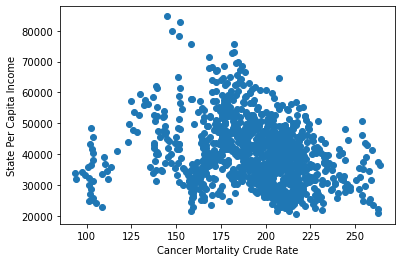

In [17]:
# plot of 1063 raw data points
plt.scatter(lr_df.CRUDE_RATE, lr_df.INCOME)
plt.xlabel("Cancer Mortality Crude Rate")
plt.ylabel("State Per Capita Income")
plt.show

## Supervised ML - Linear Regression

In [18]:
# set up for ML linear regression
X = lr_df.CRUDE_RATE.values.reshape(-1,1)

In [19]:
X.shape

(1071, 1)

In [20]:
y = lr_df.INCOME

In [21]:
model = LinearRegression()

In [22]:
model.fit(X,y)

LinearRegression()

In [23]:
y_pred = model.predict(X)
print(y_pred.shape)

(1071,)


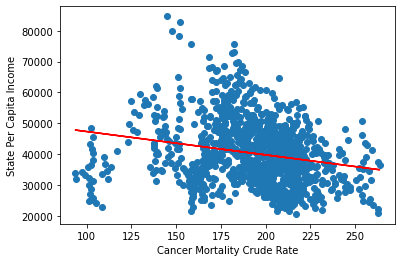

In [24]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.xlabel("Cancer Mortality Crude Rate")
plt.ylabel("State Per Capita Income")
plt.show()

In [25]:
print(model.coef_)
print(model.intercept_)

[-75.50885399]
54912.92942875992


In [26]:
r2_score(y, y_pred)

0.04654487442141109